In [400]:
#imports
import testdata.TestDataGenerator as tdg
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
import numpy

In [401]:
#definitions

DIMENSIONS=2
SENSORS= 4
COORDINATE_SYSTEM = 1



In [402]:
#Generate train data

distances, datapoints, sensors = tdg.generateIO(10000,SENSORS, DIMENSIONS,COORDINATE_SYSTEM)

#Generate Model

inp = keras.layers.Input((SENSORS,))
layer = keras.layers.Dense(64, activation='relu')(inp)
layer = keras.layers.Dense(64, activation='relu')(layer)
outp = []
for i in range(DIMENSIONS):
    outp.append(keras.layers.Dense(1, activation='sigmoid', name="dim"+str(i))(layer)) 
model = keras.models.Model(inputs=inp, outputs=outp)
model.compile(optimizer='adam', loss='mean_squared_error')

#Train Model
model.fit(distances,datapoints,epochs =5)


Epoch 1/5
10000/10000 [==============================] - 3s 250us/step - loss: 0.0336 - dim0_loss: 0.0158 - dim1_loss: 0.0178
Epoch 2/5
10000/10000 [==============================] - 0s 38us/step - loss: 0.0043 - dim0_loss: 0.0021 - dim1_loss: 0.0021
Epoch 3/5
10000/10000 [==============================] - 0s 37us/step - loss: 0.0025 - dim0_loss: 0.0012 - dim1_loss: 0.0012
Epoch 4/5
10000/10000 [==============================] - 0s 35us/step - loss: 0.0017 - dim0_loss: 8.0746e-04 - dim1_loss: 8.4731e-04
Epoch 5/5
10000/10000 [==============================] - 0s 39us/step - loss: 0.0013 - dim0_loss: 6.1124e-04 - dim1_loss: 6.5406e-04


In [403]:
test_distance, test_datapoint, test_sensor = tdg.generateFromSensors(1000, DIMENSIONS, COORDINATE_SYSTEM, sensors)      
result = model.evaluate(test_distance, test_datapoint)

for i in range(len(result)):
    print(model.metrics_names[i] + ": " + str(result[i]))
    

1000/1000 [==============================] - 1s 822us/step
loss: 0.00100625874102
dim0_loss: 0.000511742508272
dim1_loss: 0.000494516234845


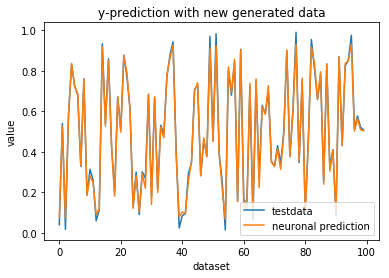

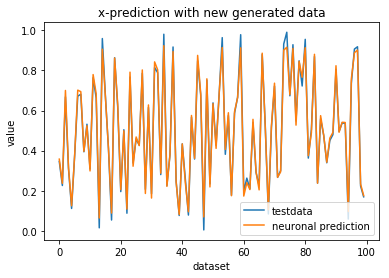

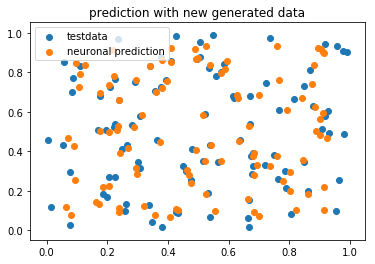

In [420]:
test_distance, test_datapoint, test_sensor = tdg.generateFromSensors(100, DIMENSIONS, COORDINATE_SYSTEM, sensors)       
    

testResult = model.predict(test_distance)

plt.figure()
plt.ylabel('value')
plt.xlabel('dataset')
plt.title('y-prediction with new generated data')
plt.plot(test_datapoint[1])   
plt.plot(testResult[1])
plt.legend(['testdata', 'neuronal prediction'])
plt.show()


plt.figure()
plt.ylabel('value')
plt.xlabel('dataset')
plt.title('x-prediction with new generated data')
plt.plot(test_datapoint[0])   
plt.plot(testResult[0])
plt.legend(['testdata', 'neuronal prediction'])
plt.show()

plt.figure()
plt.title('prediction with new generated data')
plt.scatter(test_datapoint[0], test_datapoint[1])
plt.scatter(testResult[0], testResult[1])
plt.legend(['testdata', 'neuronal prediction'])
plt.show()
